Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalisation is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values of losing information.

Few scaling are follows as :
Min Max scaling ,
Mean Normalization scaling ,
Max absolute scaling ,
Robust Scaling ,

for min-max , we always get a value between 0 and 1 .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [3]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

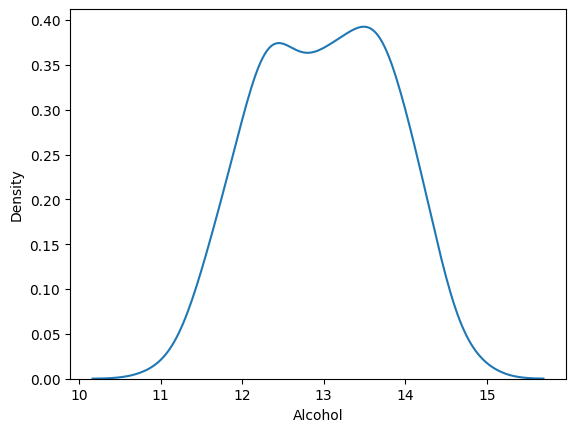

In [4]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

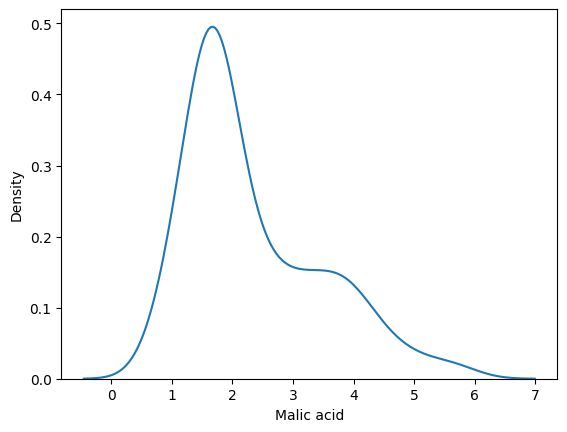

In [6]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

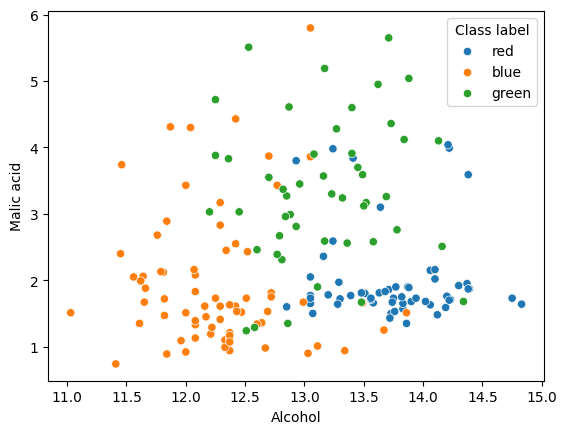

In [7]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(data=df,x='Alcohol',y='Malic acid',hue=df['Class label'].map(color_dict))

whenever you do the scaling , rembember you have first do the test and split part. then do scaling thing after test and split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0
                                                    )
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_train_scaled, columns=X_test.columns)

In [13]:
X_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [12]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [14]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


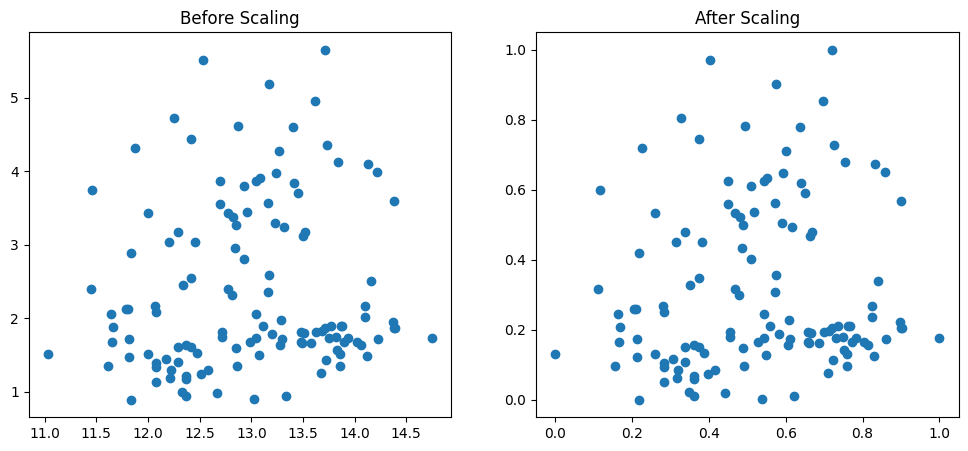

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'])
ax2.set_title('After Scaling')
plt.show()

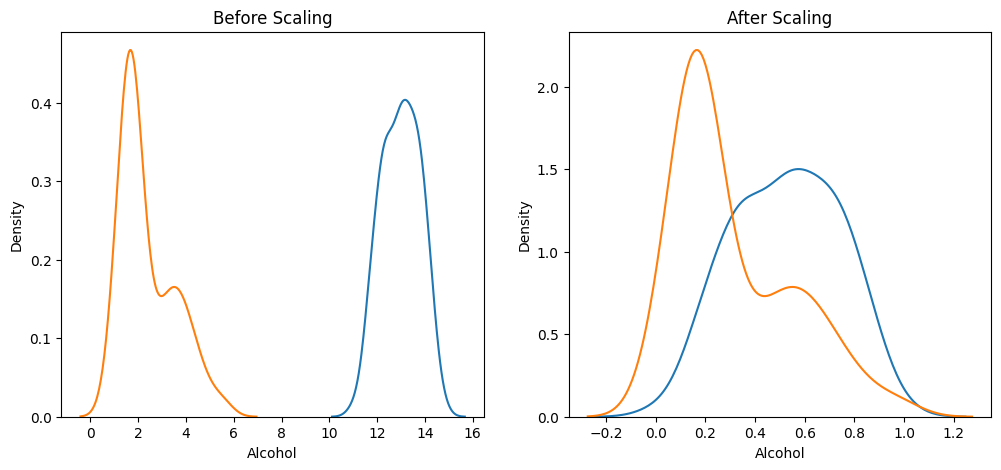

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)

plt.show()

Mean Normalization:
it will give value between -1 to 1.
it is rarely used.
there is no class in sckit-learn.
useful in centered data

Max Absolute scaling:
there is calss in sckit learn name MaxAbsScaler.
it is use for sparse data ( where is lots of zeros).


Robust Scaling:
RobustScaler class name in sckit learn
it is use for outlier if your data have lots of outlier

Normalization vs standardization

Question you have to asked in data:
? is feature scaling required

Most of better result we get in standardization.

Normalization minmax scaler is most use when you know minimum and maximum value .